In [1]:
!wget https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall19/week03_convnets/cifar.py

--2020-02-20 14:18:04--  https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall19/week03_convnets/cifar.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.244.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.244.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2396 (2.3K) [text/plain]
Saving to: ‘cifar.py’

cifar.py            100%[===================>]   2.34K  --.-KB/s    in 0s      

2020-02-20 14:18:05 (30.0 MB/s) - ‘cifar.py’ saved [2396/2396]



In [243]:
import numpy as np
from cifar import load_cifar10

In [236]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import transforms

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10("cifar_data")

class_names = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                        'dog', 'frog', 'horse', 'ship',
                        'truck'])

print(X_train.shape,y_train.shape)

In [238]:
transform_train = transforms.Compose([
   torchvision.transforms.RandomAffine(15),
   transforms.RandomCrop(32, padding=4),
   transforms.ToTensor(),
])
trainset = torchvision.datasets.CIFAR10(root='cifar_data/', train=True, download=True,
                                        transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

Files already downloaded and verified


# Data Augmentation

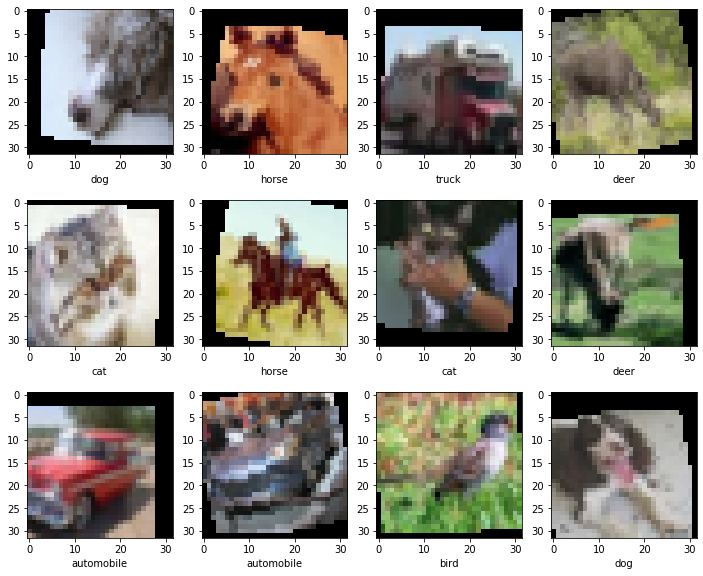

In [239]:
for (x_batch, y_batch) in trainloader:
    plt.figure(figsize=[12,10])
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.xlabel(class_names[y_batch.data.numpy()[i]])
        plt.imshow(np.transpose(x_batch.data.numpy()[i],[1,2,0]))
    plt.show()
    break

In [7]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

In [114]:
class Block(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, activation=nn.ReLU(), padding=1):
        super().__init__()

        self.conv = nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                              kernel_size=kernel_size, stride=stride, padding=padding)
        self.bn = nn.BatchNorm2d(out_channels)
        self.activation = activation

    def forward(self, inputs):
        x = self.conv(inputs)
        x = self.bn(x)
        x = self.activation(x)
        return x

In [240]:
model = nn.Sequential()


In [227]:
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
compute_loss =  nn.NLLLoss()

In [224]:
history = []
N_ITERS = 1000
BATCH_SIZE = 256

In [220]:
N_EPOCHS=5

In [230]:
%%time
model.train(True)
    
for i in range(N_EPOCHS):
    for (x_batch, y_batch) in trainloader:
        y_pred = model(x_batch)
        loss = compute_loss(y_pred, y_batch)
        loss.backward()
        opt.step()

        opt.zero_grad()
        history.append(loss)

CPU times: user 1h 19min 45s, sys: 18min 3s, total: 1h 37min 49s
Wall time: 4min 41s


In [ ]:
plt.plot(history)
plt.show()

In [ ]:
model.train(False)

test_batch_acc = []
for i in range(0, len(X_val), 500):
    x_batch = torch.tensor(X_val[i: i+500], dtype=torch.float32)
    y_batch = y_val[i: i+500].data.numpy()
    logits = model(x_batch)
    y_pred = logits.max(1)[1].data.numpy()
    test_batch_acc.append(np.mean(y_batch == y_pred))
    
print('Accuracy on validation {}'.format(np.mean(test_batch_acc)))

In [ ]:
model.train(False)

test_batch_acc = []
for i in range(0, len(X_test), 500):
    x_batch = torch.tensor(X_test[i: i+500], dtype=torch.float32)
    y_batch = y_test[i: i+500].data.numpy()
    logits = model(x_batch)
    y_pred = logits.max(1)[1].data.numpy()
    test_batch_acc.append(np.mean(y_batch == y_pred))
print('Accuracy on test {}'.format(np.mean(test_batch_acc)))